# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [142]:
#!pip install pandas

In [143]:
import pandas as pd

In [144]:
#!pip install numpy

In [145]:
import numpy as np

## Read in the file `craftcans.csv`, and look at the first first rows

In [146]:
df = pd.read_csv("craftcans.csv")

## How many rows do you have in the data? What are the column types?

In [147]:
print("The data frame 'craft cans' has", len(df), "rows.")

The data frame 'craft cans' has 2416 rows.


In [148]:
dataTypeDict = dict(df.dtypes)

In [149]:
print("The data types of each column of the data frame 'craft cans' are:", dataTypeDict)

The data types of each column of the data frame 'craft cans' are: {'Beer': dtype('O'), 'Brewery': dtype('O'), 'Location': dtype('O'), 'Style': dtype('O'), 'Size': dtype('O'), 'ABV': dtype('O'), 'IBUs': dtype('O')}


In [150]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25


# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [151]:
n = 10
df['Brewery'].value_counts()[:n].index.tolist()

['Brewery Vivant',
 'Oskar Blues Brewery',
 'Sun King Brewing Company',
 'Cigar City Brewing Company',
 'Sixpoint Craft Ales',
 'Hopworks Urban Brewery',
 'Stevens Point Brewery',
 'Great Crescent Brewery',
 '21st Amendment Brewery',
 'Bonfire Brewing Company']

## What is the most common ABV? (alcohol by volume)

In [152]:
n = 1
df['ABV'].value_counts()[:n].index.tolist()

['5.00%']

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [153]:
df.ABV.head()

0    4.50%
1    4.90%
2    4.80%
3    6.00%
4    6.00%
Name: ABV, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [154]:
df['ABV'] = df['ABV'].str.replace('%','')

In [155]:
df.ABV.head()

0    4.50
1    4.90
2    4.80
3    6.00
4    6.00
Name: ABV, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [156]:
df['ABV'] = df['ABV'].astype(float)

In [157]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [186]:
df['ABV'].mean().round(2)

5.98

In [159]:
df['ABV'].median()

5.6

<AxesSubplot:>

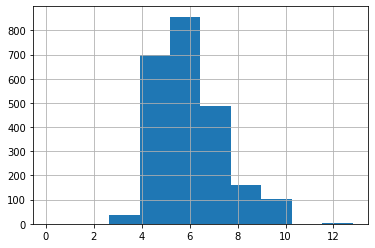

In [160]:
df['ABV'].hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [161]:
null_abv = pd.isnull(df['ABV'])

In [162]:
df[null_abv]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
94,Bastian,James Page Brewing Company,"Stevens Point, WI",American Strong Ale,12 oz.,NaN,Does not apply
199,Professor Black,Blue Owl Brewing,"Austin, TX",American Stout,12 oz.,NaN,Does not apply
200,Little Boss,Blue Owl Brewing,"Austin, TX",American Pale Wheat Ale,12 oz.,NaN,Does not apply
201,Van Dayum!,Blue Owl Brewing,"Austin, TX",American Amber / Red Ale,12 oz.,NaN,Does not apply
202,Spirit Animal,Blue Owl Brewing,"Austin, TX",American Pale Ale (APA),12 oz.,NaN,Does not apply
...,...,...,...,...,...,...,...
2357,Lift Bridge Brown Ale,Keweenaw Brewing Company,"Houghton, MI",American Brown Ale,12 oz.,NaN,Does not apply
2358,Pick Axe Blonde Ale,Keweenaw Brewing Company,"Houghton, MI",American Blonde Ale,12 oz.,NaN,Does not apply
2359,Red Jacket Amber Ale,Keweenaw Brewing Company,"Houghton, MI",American Amber / Red Ale,12 oz.,NaN,Does not apply
2374,(16 oz.) (2010),NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
num_null_values = df['ABV'].isna().sum()

In [164]:
print("There are",num_null_values,"missing ABV values in our dataframe.")

There are 68 missing ABV values in our dataframe.


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [165]:
n = 10

df['Location'].value_counts()[:n].index.tolist()

['Grand Rapids, MI',
 'Chicago, IL',
 'Portland, OR',
 'Indianapolis, IN',
 'San Diego, CA',
 'Boulder, CO',
 'Denver, CO',
 'Brooklyn, NY',
 'Seattle, WA',
 'Longmont, CO']

## List all of the beer from Brooklyn, NY

In [166]:
df[(df.Location == 'Brooklyn, NY')]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.5,Does not apply
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
987,KelSo Nut Brown Lager,KelSo Beer Company,"Brooklyn, NY",Euro Dark Lager,12 oz.,5.7,19


## What brewery in Brooklyn puts out the most cans of beer?

In [167]:
# First need to groupby location == Brooklyn. Then count which brewery appears the most.

most_prod_brew_bkny = df[df.Location == 'Brooklyn, NY'].value_counts('Brewery')[:n].index[0]

print("The brewery that puts out the most cans of beer is", most_prod_brew_bkny)

The brewery that puts out the most cans of beer is Sixpoint Craft Ales


## What are the five most popular styles of beer produced by Sixpoint?

In [168]:
df.loc[df['Brewery'] == 'Sixpoint Craft Ales']

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.5,62
713,Sensi Harvest,Sixpoint Craft Ales,"Brooklyn, NY",American Pale Ale (APA),12 oz.,4.7,50
969,Hi-Res,Sixpoint Craft Ales,"Brooklyn, NY",American Double / Imperial IPA,12 oz.,9.9,111
1057,Global Warmer,Sixpoint Craft Ales,"Brooklyn, NY",American Strong Ale,12 oz.,7.0,70
1074,Autumnation (2013),Sixpoint Craft Ales,"Brooklyn, NY",American IPA,16 oz.,6.7,74
1267,The Crisp,Sixpoint Craft Ales,"Brooklyn, NY",German Pilsener,16 oz.,5.4,42


In [169]:
n = 5

df[df.Brewery == 'Sixpoint Craft Ales'].value_counts('Style')[:n].index.tolist()

['American IPA',
 'American Double / Imperial IPA',
 'Baltic Porter',
 'Cream Ale',
 'German Pilsener']

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [170]:
df = df.dropna(subset=['Location'])

In [171]:
df['Location'] = df['Location'].astype('str') 

In [172]:
df[df['Location'].str.contains("NY")]

,Beer,Brewery,Location,Style,Size,ABV,IBUs
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.0,52
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.2,16
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.0,Does not apply
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.0,Does not apply
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.2,7
...,...,...,...,...,...,...,...
2351,Brooklyn Lager (12 oz.),Brooklyn Brewery,"Brooklyn, NY",American Amber / Red Lager,12 oz.,5.2,Does not apply
2364,Heinnieweisse Weissebier,Butternuts Beer and Ale,"Garrattsville, NY",Hefeweizen,12 oz.,4.9,Does not apply
2365,Snapperhead IPA,Butternuts Beer and Ale,"Garrattsville, NY",American IPA,12 oz.,6.8,Does not apply
2366,Moo Thunder Stout,Butternuts Beer and Ale,"Garrattsville, NY",Milk / Sweet Stout,12 oz.,4.9,Does not apply


### Now *count* all of the breweries in New York state

In [173]:
df[df['Location'].str.contains("NY")].value_counts()

Beer                              Brewery                  Location           Style                           Size    ABV  IBUs          
3Beans                            Sixpoint Craft Ales      Brooklyn, NY       Baltic Porter                   12 oz.  9.9  85                1
Hipster Ale (Westbrook Brewing)   Evil Twin Brewing        Brooklyn, NY       American Pale Ale (APA)         12 oz.  5.5  Does not apply    1
Resin                             Sixpoint Craft Ales      Brooklyn, NY       American Double / Imperial IPA  12 oz.  9.1  103               1
Rad                               Sixpoint Craft Ales      Brooklyn, NY       Fruit / Vegetable Beer          16 oz.  3.2  7                 1
Porkslap Pale Ale                 Butternuts Beer and Ale  Garrattsville, NY  American Pale Ale (APA)         12 oz.  4.3  Does not apply    1
                                                                                                                                            ..
Comm

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [174]:
df[df['Beer'].str.contains("IPA")].value_counts()

Beer                          Brewery                       Location             Style                           Size    ABV  IBUs          
Dagger Falls IPA              Sockeye Brewing Company       Boise, ID            American IPA                    12 oz.  6.3  100               3
Green Monsta IPA              Wachusett Brewing Company     Westminster, MA      American IPA                    12 oz.  6.0  55                2
Hop Slayer Double IPA (2011)  Wild Onion Brewing Company    Lake Barrington, IL  American Double / Imperial IPA  12 oz.  8.2  100               2
113 IPA                       Sly Fox Brewing Company       Pottstown, PA        American IPA                    12 oz.  7.0  113               1
Norm's Gateway IPA            Griffin Claw Brewing Company  Birmingham, MI       American IPA                    12 oz.  4.0  55                1
                                                                                                                                 

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [175]:
# df['IBUs'].mean()

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [180]:
# Replace 'does not apply' with 'NaN'

df['IBUs'] = df['IBUs'].replace(['Does not apply'],np.nan)

In [183]:
df['IBUs'] = pd.to_numeric(df.IBUs, errors='coerce')

In [185]:
df['IBUs'].mean().round(2)

42.71

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

In [297]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

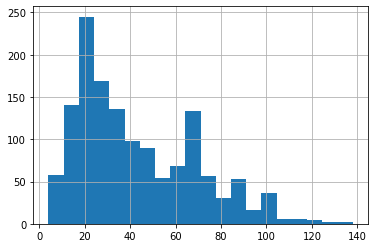

In [191]:
df.IBUs.hist(bins = 20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [214]:
df.query('IBUs > IBUs.quantile(.75)')

,Beer,Brewery,Location,Style,Size,ABV,IBUs
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.0,68.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.5,80.0
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.6,68.0
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.0,65.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.2,80.0
...,...,...,...,...,...,...,...
2408,Brew Free! or Die IPA,21st Amendment Brewery,"San Francisco, CA",American IPA,12 oz.,7.0,65.0
2410,Ten Fidy Imperial Stout,Oskar Blues Brewery,"Longmont, CO",Russian Imperial Stout,12 oz.,9.9,98.0
2412,GUBNA Imperial IPA,Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,9.9,100.0
2414,Gordon Ale (2009),Oskar Blues Brewery,"Longmont, CO",American Double / Imperial IPA,12 oz.,8.7,85.0


## List all of the beers with IBUs below the 25th percentile

In [215]:
df.query('IBUs < IBUs.quantile(.25)')

,Beer,Brewery,Location,Style,Size,ABV,IBUs
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.8,19.0
12,Sho'nuff,Against the Grain Brewery,"Louisville, KY",Belgian Pale Ale,16 oz.,4.0,13.0
13,Bloody Show,Against the Grain Brewery,"Louisville, KY",American Pilsner,16 oz.,5.5,17.0
18,The Brown Note,Against the Grain Brewery,"Louisville, KY",English Brown Ale,16 oz.,5.0,20.0
19,House Lager,Jack's Abby Craft Lagers,"Framingham, MA",Keller Bier / Zwickel Bier,16 oz.,5.2,18.0
...,...,...,...,...,...,...,...
2372,Bombshell Blonde,Southern Star Brewing Company,"Conroe, TX",American Blonde Ale,12 oz.,5.0,20.0
2385,Bikini Blonde Lager,Maui Brewing Company,"Lahaina, HI",Munich Helles Lager,12 oz.,4.5,18.0
2396,Royal Weisse Ale,Sly Fox Brewing Company,"Pottstown, PA",Hefeweizen,12 oz.,5.6,11.0
2404,Hell,Surly Brewing Company,"Brooklyn Center, MN",Keller Bier / Zwickel Bier,16 oz.,5.1,20.0


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

In [217]:
df.groupby(['Style'])['IBUs'].median()

Style
Abbey Single Ale              22.0
Altbier                       36.5
American Adjunct Lager         9.0
American Amber / Red Ale      31.0
American Amber / Red Lager    23.0
                              ... 
Tripel                        27.5
Vienna Lager                  23.5
Wheat Ale                     24.0
Winter Warmer                 22.0
Witbier                       15.5
Name: IBUs, Length: 99, dtype: float64

In [218]:
med_IBU = df.groupby(['Style'])['IBUs'].median()

In [220]:
med_IBU.sort_values(ascending = False)

Style
American Barleywine                   96.0
Russian Imperial Stout                94.0
American Double / Imperial IPA        91.0
American Double / Imperial Pilsner    85.0
American Black Ale                    73.0
                                      ... 
Kristalweizen                          NaN
Low Alcohol Beer                       NaN
Mead                                   NaN
Rauchbier                              NaN
Shandy                                 NaN
Name: IBUs, Length: 99, dtype: float64

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

In [221]:
high_IBU = df.query('IBUs > IBUs.quantile(.75)')

In [225]:
high_IBU['Style'].value_counts().head(5)

American IPA                      195
American Double / Imperial IPA     72
American Pale Ale (APA)            18
American Black Ale                 15
American Strong Ale                 9
Name: Style, dtype: int64

In [226]:
low_IBU = df.query('IBUs < IBUs.quantile(.25)')

In [227]:
low_IBU['Style'].value_counts().head(5)

American Pale Wheat Ale    43
American Blonde Ale        36
Fruit / Vegetable Beer     28
Hefeweizen                 21
Witbier                    20
Name: Style, dtype: int64

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

In [252]:
# wheats = df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])

In [ ]:
# I have the variable 'wheats' that includes all the wheat beers.
# How do I get the mean IBU of all the wheats?

In [247]:
# df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])['IBUs'].mean()
# KeyError: 'IBUs'

In [250]:
df.loc[(df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])),'IBUs'].mean().round(2)

18.98

## Draw a histogram of the IBUs of those beers

In [255]:
# wheats.hist() doesn't work for a histogram.

In [294]:
histo_wheat_data = df.loc[(df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])),'IBUs']

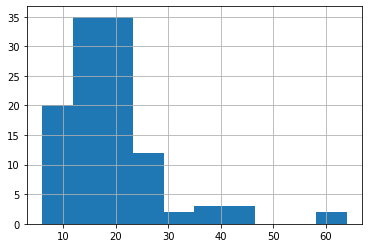

In [290]:
histo_wheat = df.loc[(df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])),'IBUs'].hist()

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [274]:
ipa_beer = df[df['Style'].str.contains("IPA")]

In [280]:
ipa_mean_ibu = ipa_beer['IBUs'].mean().round(2)

In [281]:
print("The average IBU of IPAs is",ipa_mean_ibu)

The average IBU of IPAs is 71.95


In [295]:
histo_ipa_data = ipa_beer['IBUs']

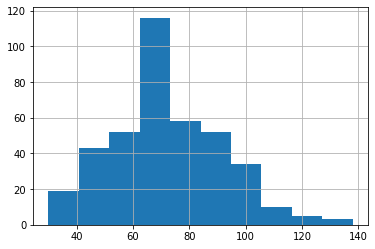

In [291]:
histo_ipa = ipa_beer['IBUs'].hist()

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

(array([20., 35., 35., 12.,  2.,  3.,  3.,  0.,  0.,  2.]),
 array([ 6. , 11.8, 17.6, 23.4, 29.2, 35. , 40.8, 46.6, 52.4, 58.2, 64. ]),
 <BarContainer object of 10 artists>)

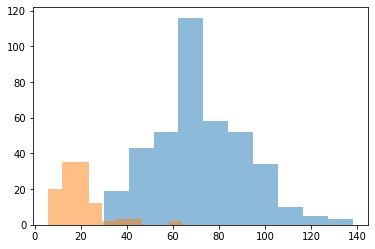

In [299]:
plt.hist(histo_ipa_data, alpha = 0.5)
plt.hist(histo_wheat_data, alpha = 0.5)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

In [304]:
wheat_abv = df.loc[(df['Style'].isin(['Witbier', 'Hefeweizen', 'American Pale Wheat Ale'])),'ABV'].mean().round(2)

In [305]:
ipa_abv = ipa_beer['ABV'].mean().round(2)

In [306]:
print("The avg ABV of wheat beers is", wheat_abv,"and the avg ABV of IPAs is", ipa_abv)

The avg ABV of wheat beers is 5.04 and the avg ABV of IPAs is 6.88


## Good work!

If you made it this far you deserve a drink.

In [300]:
print("Cheers")

Cheers
